# Analyse des données d'expérience

Expérience: J7 Energie Solaire

Date: 2023-09-30

In [33]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Save figs for latex
import matplotlib as mpl
import tikzplotlib as tikz
from options import *

# print(mpl.rcParams.keys())

## Expérience 4: Reaction à des longueurs d'onde spécifiques

### Puissance lumineuse

In [35]:
pgammaSdata = pd.read_csv("../data/Pgamma(filtre),d=42cm.csv", delimiter=", ", header=0)

filtres = pgammaSdata["Filtre"]
PgammaS = pgammaSdata["Pgamma [W/m^2]"]
Pgamma = PgammaS * 0.01
l = 0.01
S = 0.01
deltaS = 0.0004 # m^2
delta_PgammaS = np.ones(len(PgammaS))
delta_Pgamma = delta_PgammaS * S + deltaS * PgammaS
delta_Pgamma

/tmp/ipykernel_15131/3365768377.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pgammaSdata = pd.read_csv("../data/Pgamma(filtre),d=42cm.csv", delimiter=", ", header=0)


0    0.06444
1    0.05468
2    0.05440
3    0.05336
4    0.04648
5    0.03592
6    0.03860
7    0.04160
Name: Pgamma [W/m^2], dtype: float64

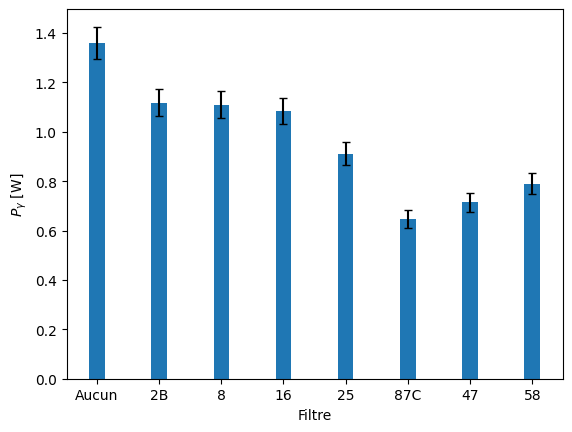

In [36]:
plt.bar(filtres, Pgamma, yerr=delta_Pgamma, width=barwidth, capsize=capsize)
plt.xlabel("Filtre")
plt.ylabel("$P_{\gamma}$ [W]")
tikz.save("../plots/Pgamma(filtre).tikz")

### Amorphe

/tmp/ipykernel_15131/136060254.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  igammadata = pd.read_csv("../data/Igamma(filtre),amorphe,d=42cm.csv", delimiter=", ")


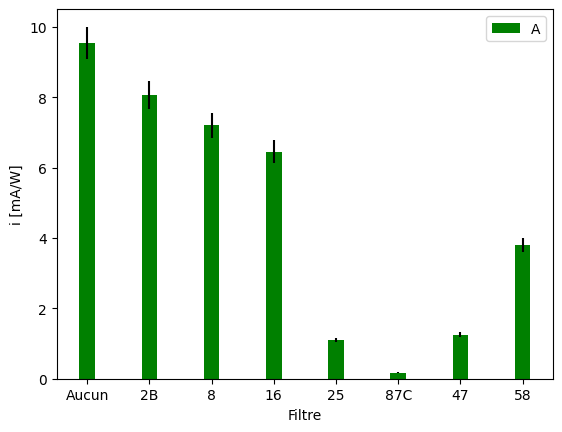

In [37]:
# i = Igamma / Pgamma
igammadata = pd.read_csv("../data/Igamma(filtre),amorphe,d=42cm.csv", delimiter=", ")
Igamma = igammadata["Igamma [mA]"]
delta_igamma = np.ones(len(Igamma)) * 0.003

# Fit data linearly
i = Igamma / Pgamma
delta_i = delta_igamma / Pgamma + Igamma / (Pgamma ** 2) * delta_Pgamma
x = np.arange(len(filtres))

plt.bar(x, i, yerr=delta_i, width=barwidth, color=colors["A"], label="A")
plt.legend()
plt.xticks(x, pgammaSdata["Filtre"])
plt.xlabel("Filtre")
plt.ylabel("i [mA/W]")
tikz.save("../plots/i(filtre),A.tikz")

### Monocristallin

### Polycristallin

/tmp/ipykernel_15131/4245391211.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  igammadata = pd.read_csv("../data/Igamma(filtre),monocristallin,d=42cm.csv", delimiter=", ")
/tmp/ipykernel_15131/4245391211.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  igammadata = pd.read_csv("../data/Igamma(filtre),polycristallin,d=42cm.csv", delimiter=", ")


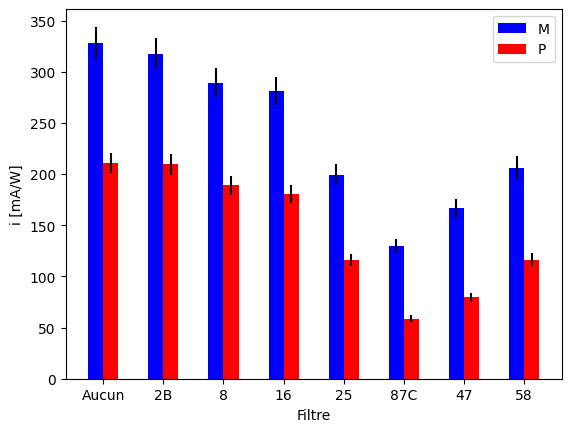

In [38]:
x = np.arange(len(igammadata["Filtre"]))

igammadata = pd.read_csv("../data/Igamma(filtre),monocristallin,d=42cm.csv", delimiter=", ")
Igamma = igammadata["Igamma [mA]"]
delta_igamma = np.ones(len(Igamma)) * 0.003

# i = Igamma / Pgamma
i = Igamma / Pgamma
delta_i = delta_igamma / Pgamma + Igamma / (Pgamma ** 2) * delta_Pgamma

plt.bar(x, i, yerr=delta_i, width=barwidth, color=colors["M"], label="M")

# i = Igamma / Pgamma
igammadata = pd.read_csv("../data/Igamma(filtre),polycristallin,d=42cm.csv", delimiter=", ")
Igamma = igammadata["Igamma [mA]"]
delta_igamma = np.ones(len(Igamma)) * 0.003

i = Igamma / Pgamma
delta_i = delta_igamma / Pgamma + Igamma / (Pgamma ** 2) * delta_Pgamma

plt.bar(x + barwidth, i, yerr=delta_i, width=barwidth, color=colors["P"], label="P")

plt.legend()
plt.xticks(x + barwidth/2, filtres)
plt.xlabel("Filtre")
plt.ylabel("i [mA/W]")
tikz.save("../plots/i(filtre),MP.tikz")